<a href="https://colab.research.google.com/github/parulian-johannes/tugas_menghitung_nilai_pi/blob/main/Tugas_menghitung_estimasi_nilai_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N=10
  Hasil perkiraan nilai pi: 3.141592613939215
  Galat RMS: 3.9650577932093256e-08
  Waktu eksekusi: 2.4318695068359375e-05 detik

N=100
  Hasil perkiraan nilai pi: 3.141592653589754
  Galat RMS: 3.907985046680551e-14
  Waktu eksekusi: 7.987022399902344e-05 detik

N=1000
  Hasil perkiraan nilai pi: 3.141592653589794
  Galat RMS: 8.881784197001252e-16
  Waktu eksekusi: 0.0007078647613525391 detik

N=10000
  Hasil perkiraan nilai pi: 3.141592653589784
  Galat RMS: 9.325873406851315e-15
  Waktu eksekusi: 0.007009029388427734 detik



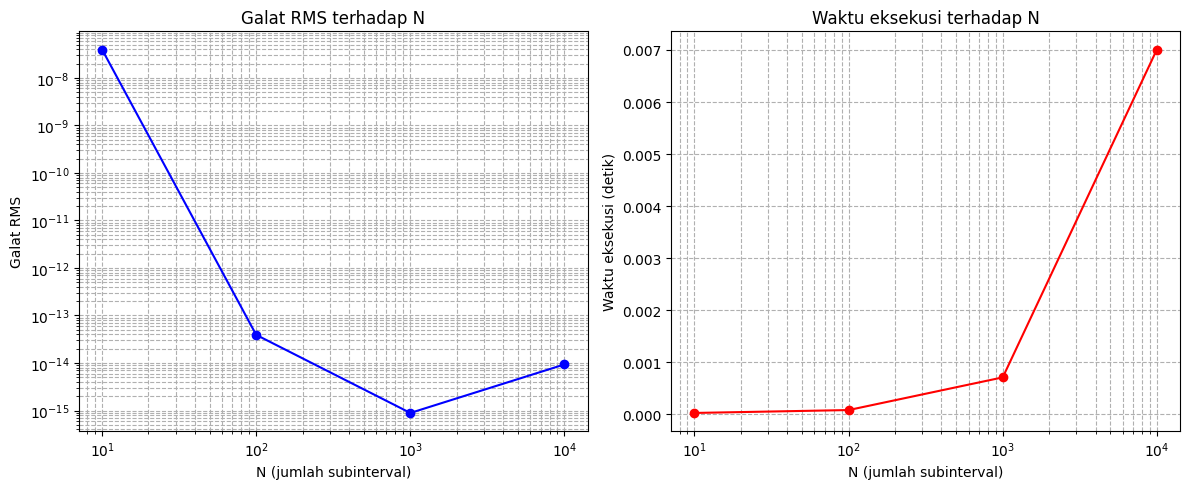

In [1]:
import time
import math
import matplotlib.pyplot as plt

def f(x):
    return 4 / (1 + x**2)

def simpson_integration(a, b, n):
    if n % 2 == 1:
        n += 1  # Simpson's rule requires an even number of intervals
    h = (b - a) / n
    integral = f(a) + f(b)
    for i in range(1, n, 2):
        integral += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        integral += 2 * f(a + i * h)
    integral *= h / 3
    return integral

# Batas integral
a = 0
b = 1

# Variasi nilai N
n_values = [10, 100, 1000, 10000]

# Nilai referensi pi
pi_reference = 3.14159265358979323846

# Melakukan testing untuk setiap nilai N
results = {}
rms_errors = []
execution_times = []

for n in n_values:
    start_time = time.time()
    result = simpson_integration(a, b, n)
    end_time = time.time()

    execution_time = end_time - start_time
    rms_error = math.sqrt((result - pi_reference) ** 2)

    results[n] = result
    rms_errors.append(rms_error)
    execution_times.append(execution_time)

    print(f"N={n}")
    print(f"  Hasil perkiraan nilai pi: {result}")
    print(f"  Galat RMS: {rms_error}")
    print(f"  Waktu eksekusi: {execution_time} detik\n")

# Membuat grafik galat RMS terhadap N
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_values, rms_errors, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (jumlah subinterval)')
plt.ylabel('Galat RMS')
plt.title('Galat RMS terhadap N')
plt.grid(True, which="both", ls="--")

# Membuat grafik waktu eksekusi terhadap N
plt.subplot(1, 2, 2)
plt.plot(n_values, execution_times, marker='o', linestyle='-', color='r')
plt.xscale('log')
plt.xlabel('N (jumlah subinterval)')
plt.ylabel('Waktu eksekusi (detik)')
plt.title('Waktu eksekusi terhadap N')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()
